In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

In [2]:
data = pd.read_csv('Europenaprotein.csv')
data.head(10)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [3]:
data.shape

(25, 10)

In [4]:
data.isna().sum()

Country      0
RedMeat      0
WhiteMeat    0
Eggs         0
Milk         0
Fish         0
Cereals      0
Starch       0
Nuts         0
Fr&Veg       0
dtype: int64

In [5]:
data.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


In [6]:
X = data.iloc[:, 1:]

# Model building

In [7]:
from sklearn.cluster import KMeans

K = range(1, 16)
wcss = [KMeans(n_clusters = k, random_state=42).fit(X) for k in K]
res = [_.inertia_ for _ in wcss]

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The 

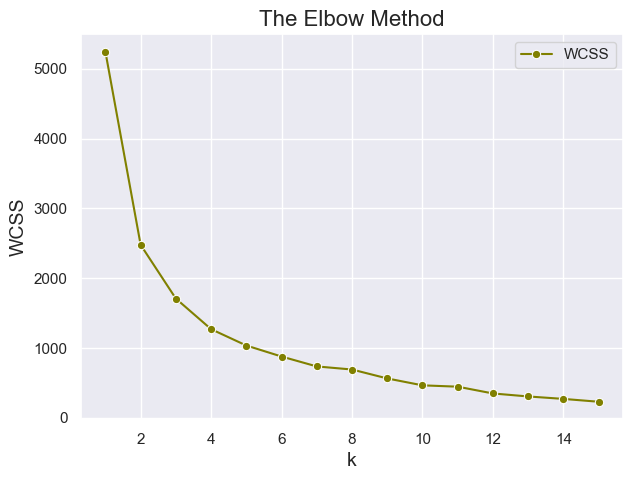

In [9]:
sns.set(style="darkgrid")

plt.figure(figsize=(7, 5))
sns.lineplot(x=K, y=res, marker='o', color='olive', label='WCSS')
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.show()

In [10]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The 

KMeans(n_clusters=5, random_state=42)

In [11]:
model.labels_

array([1, 4, 4, 2, 1, 0, 3, 0, 4, 1, 1, 4, 1, 4, 0, 1, 3, 2, 3, 0, 4, 4,
       1, 4, 2])

In [12]:
data['cluster'] = model.labels_

# Visualize results

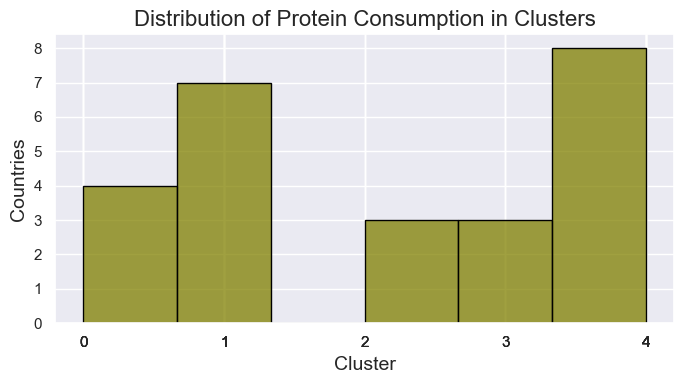

In [19]:
plt.figure(figsize=(7, 4))
sns.histplot(data['cluster'], color='olive', edgecolor='black')
plt.xticks(model.labels_)
plt.ylabel('Countries', fontsize=14)
plt.xlabel('Cluster', fontsize=14)
plt.title('Distribution of Protein Consumption in Clusters', fontsize=16)
plt.tight_layout()
plt.show()